TikZ and PGF are TeX packages for creating graphics programmatically. TikZ is built on top of PGF and allows you to create sophisticated graphics in a rather intuitive and easy manner.

In [73]:
%reload_ext tikzmagic

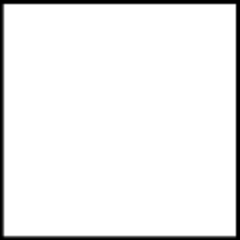

In [74]:
%tikz \draw (0,0) rectangle (1,1);

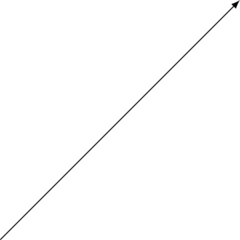

In [67]:
%%tikz [>=latex'] 
\draw [->] (0,0) -- (4,4); 

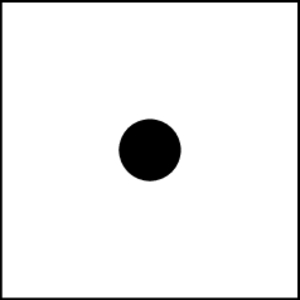

In [68]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

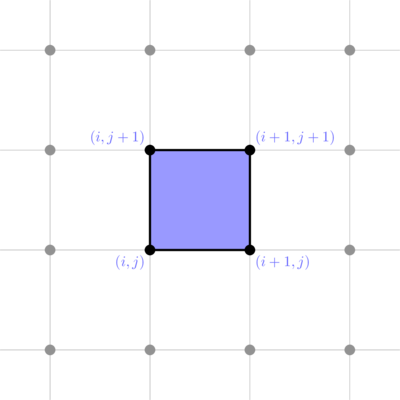

In [69]:
%%tikz -s 400,400 -sc 1.2 -f png
[>=latex']
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);

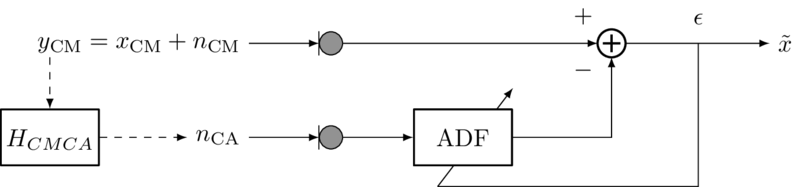

In [70]:
%%tikz -s 800,400
\node[](des_sig) {$y_\text{CM} = x_\text{CM}+n_\text{CM}$};
\node[circle,draw,right = of des_sig,fill=gray] (Y1) {};
\node[circle,draw,below = of Y1,fill=gray] (Y2) {};
\draw [-] let \p0 = (Y1.north), \p1 = (Y1.south), \p2 = (Y1.west) in (\x2,\y0) -- (\x2,\y1);
\draw [-] let \p0 = (Y2.north), \p1 = (Y2.south), \p2 = (Y2.west) in (\x2,\y0) -- (\x2,\y1);
\path let \p1 = (des_sig.west), \p2 = (Y2.west) in node[dspfilter] (HCMCA)  at (\x1+3mm,\y2) {$H_{CMCA}$};
\draw [->,dashed] let \p0 = (des_sig.west), \p1 = (HCMCA.north) in (\x0+3mm,\y0-2mm) -- (\x1,\y1);
\node[right = of HCMCA,xshift=.7em] (n) {$n_{\text{CA}}$};
\draw [->,dashed] (HCMCA.east) -- (n.west);
\draw [->] (n.east) -- (Y2.west);
\node[dspfilter,right = of Y2] (ADF) {ADF};
\node[dspadder,right = of Y1,label={above left:$+$},label={below left:$-$},xshift=7.5em] (sum2) {};
\draw [->] (Y1.east) -- (sum2.west);
\draw [->] (Y2.east) -- (ADF.west);
\node[right = of sum2,xshift=3em](filt_sig) {$\tilde{x}$};
\draw [->] (ADF.east) -| (sum2.south);
\draw [->] (sum2.east) -- (filt_sig.west);
\draw [->] (des_sig.east) -- (Y1.west);
\node[right=of sum2] (afupd1) {};
\draw[-] let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$), \p2=(ADF.west) in (\x1,\y0) |- (\x2+1em,\y2-2em);
\path let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$)in node[] (error)  at (\x1,\y0+1em) {$\epsilon$};
\draw[->] let \p1=(ADF.west), \p2=(ADF.east) in (\x1+1em,\y1-2em) -- (\x2,\y2+2em);
\node[dspfilter,right = of Y2,fill=white] (ADF) {ADF};

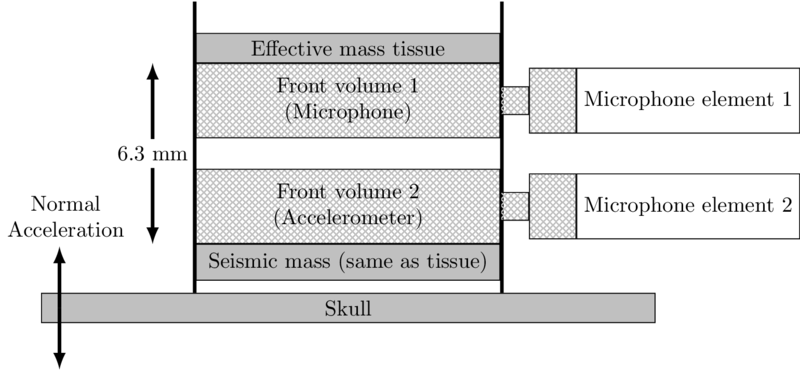

In [82]:
%%tikz -s 800,400

% skull rectangle
\node[draw,minimum width=10cm,minimum height=3ex,fill=lightgrey] (skull) {Skull};

% draw supporting lines
\draw[-,,black,ultra thick] let \p1=($(skull.north)!0.5!(skull.north east)$) in (\x1,\y1) -- (\x1,5);
\draw[-,,black,ultra thick] let \p1=($(skull.north)!0.5!(skull.north west)$) in (\x1,\y1) -- (\x1,5);

% draw acceleration lines
\draw[->,,black,ultra thick] let \p1=(skull.north west),\p2 =($(skull.north)!0.5!(skull.south)$)  in (\x1+.3cm,\y2) -- (\x1+.3cm,1);
\draw[->,,black,ultra thick] let \p1=(skull.north west),\p2 =($(skull.north)!0.5!(skull.south)$)  in (\x1+.3cm,\y2) -- (\x1+.3cm,-1);
\path let \p1 = (skull.north west) in node[align = center] at (\x1+.4cm,1.5) {Normal \\ Acceleration};

% seismic mass 
\path let \p1=($(skull.north)!0.5!(skull.north west)$) in node[draw,minimum width=4.95cm,minimum height=3ex,fill=lightgrey,anchor=south west] (SM)  at (\x1+.5,\y1+.2cm) {Seismic mass (same as tissue)};
% front volume 2
\path let \p1=(SM.north west) in node[draw,minimum width=4.95cm,minimum height=8ex,anchor=south west,pattern=crosshatch,pattern color=lightgrey,align = center] (FV2)  at (\x1,\y1) {Front volume 2 \\ (Accelerometer)};
% front volume 1
\path let \p1=(FV2.north west) in node[draw,minimum width=4.95cm,minimum height=8ex,anchor=south west,pattern=crosshatch,pattern color=lightgrey,align = center] (FV1)  at (\x1,\y1+.5cm) {Front volume 1 \\ (Microphone)};
% effective mass
\path let \p1=(FV1.north west) in node[draw,minimum width=4.95cm,minimum height=3ex,anchor=south west,fill=lightgrey] (EM)  at (\x1,\y1) {Effective mass tissue};

% distance between elements
\path let \p1=($(FV1.south west)!0.5!(FV2.north west)$) in node (dist) at (\x1-2em,\y1) {6.3 mm};
\draw[->,black,ultra thick] let \p1=(dist.north), \p2=(FV1.north west) in (\x1,\y1) -- (\x1,\y2);
\draw[->,black,ultra thick] let \p1=(dist.south), \p2=(FV2.south west) in (\x1,\y1) -- (\x1,\y2);

% microphone label
%\path let \p1=(FV1.west)  in node[anchor=east] (ML) at (\x1,\y1) {Microphone};
% accelerometer label
%\path let \p1=(FV2.west)  in node[anchor=east] (AL) at (\x1,\y1) {Accelerometer};


% microphone element 1
\path let \p1=(FV1.east) in node[draw,minimum width=3ex,minimum height=3ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn)  at (\x1,\y1) {};
\path let \p1=(mic_conn.east) in node[draw,minimum width=5ex,minimum height=7ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn1)  at (\x1,\y1) {};
\path let \p1=(mic_conn1.east) in node[draw,minimum width=15ex,minimum height=7ex,anchor=west] (mic_el1)  at (\x1,\y1) {Microphone element 1};

% microphone element 2
\path let \p1=(FV2.east) in node[draw,minimum width=3ex,minimum height=3ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn2)  at (\x1,\y1) {};
\path let \p1=(mic_conn2.east) in node[draw,minimum width=5ex,minimum height=7ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn3)  at (\x1,\y1) {};
\path let \p1=(mic_conn3.east) in node[draw,minimum width=15ex,minimum height=7ex,anchor=west] (mic_el2)  at (\x1,\y1) {Microphone element 2};


%\draw[-,black,ultra thick] ($(skull.north)!0.5!(skull.north east)$) -- (0,5);

%\draw ($(skull.north)!0.5!(skull.north east)$ -- 5,10) node {B};
